<a href="https://colab.research.google.com/github/MetalHeadv3/Machine-Learning/blob/main/Analiza_sentymentu_cytaty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

quotes = []
authors = []
page = 1

while True:
    url = f"https://quotes.toscrape.com/page/{page}/"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

    quote_blocks = soup.select(".quote")
    if not quote_blocks:
        break  # koniec stron

    for quote in quote_blocks:
        text = quote.select_one(".text").text.strip()
        author = quote.select_one(".author").text.strip()
        quotes.append(text)
        authors.append(author)

    page += 1

df = pd.DataFrame({"Cytat": quotes, "Autor": authors})
df.head(10)



,Cytat,Autor
0,“The world as we have created it is a process ...,Albert Einstein
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling
2,“There are only two ways to live your life. On...,Albert Einstein
3,"“The person, be it gentleman or lady, who has ...",Jane Austen
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe
5,“Try not to become a man of success. Rather be...,Albert Einstein
6,“It is better to be hated for what you are tha...,André Gide
7,"“I have not failed. I've just found 10,000 way...",Thomas A. Edison
8,“A woman is like a tea bag; you never know how...,Eleanor Roosevelt
9,"“A day without sunshine is like, you know, nig...",Steve Martin


In [7]:
!pip install textblob


In [8]:
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity  # wartość od -1 (negatywny) do +1 (pozytywny)

df["Sentyment"] = df["Cytat"].apply(get_sentiment)


In [9]:
print(df[["Cytat", "Sentyment"]].sort_values(by="Sentyment", ascending=False).head(5))  # pozytywne
print(df[["Cytat", "Sentyment"]].sort_values(by="Sentyment").head(5))  # negatywne


                                                Cytat  Sentyment
18  “Good friends, good books, and a sleepy consci...   0.766667
29  “One good thing about music, when it hits you,...   0.700000
26  “If you want your children to be intelligent, ...   0.650000
38  “I have always imagined that Paradise will be ...   0.600000
82  “Remember, if the time should come when you ha...   0.563810
                                                Cytat  Sentyment
71  “Some people never go crazy. What truly horrib...  -0.800000
55  “The difference between genius and stupidity i...  -0.600000
24  “Beauty is in the eye of the beholder and it m...  -0.322222
39  “It is never too late to be what you might hav...  -0.300000
4   “Imperfection is beauty, madness is genius and...  -0.277778


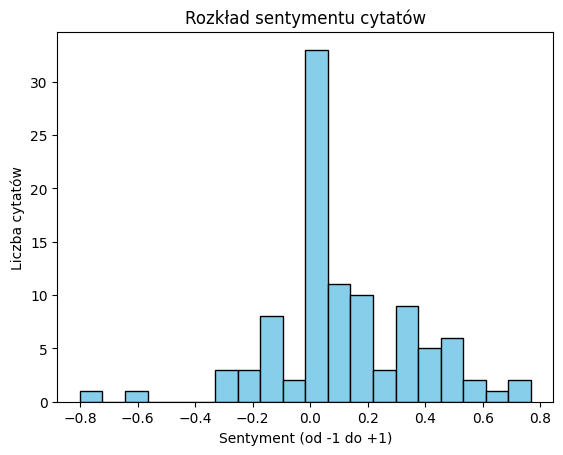

In [10]:
import matplotlib.pyplot as plt

plt.hist(df["Sentyment"], bins=20, color="skyblue", edgecolor="black")
plt.title("Rozkład sentymentu cytatów")
plt.xlabel("Sentyment (od -1 do +1)")
plt.ylabel("Liczba cytatów")
plt.show()


In [17]:
autor_sentyment = df.groupby("Autor")["Sentyment"].mean()
liczba_cytatow = df["Autor"].value_counts()

ranking = pd.DataFrame({
    "Średni sentyment": autor_sentyment,
    "Liczba cytatów": liczba_cytatow
}).dropna()

# Filtrowanie: tylko autorzy z ≥ 3 cytatam, żeby wyniki nie były zaburzone przez autorów co mają 1 cytat
ranking = ranking[ranking["Liczba cytatów"] >= 3]

ranking = ranking.sort_values(by="Średni sentyment", ascending=False)
ranking.head(10)


,Średni sentyment,Liczba cytatów
Autor,,
Bob Marley,0.433929,3
Jane Austen,0.229583,5
J.K. Rowling,0.179459,9
Marilyn Monroe,0.148537,7
Albert Einstein,0.132652,10
Dr. Seuss,0.125690,6
C.S. Lewis,0.093407,5
Mark Twain,0.072222,6


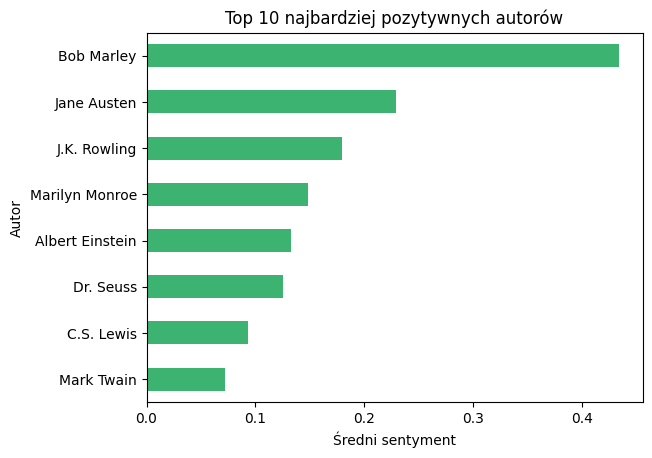

In [18]:
import matplotlib.pyplot as plt

ranking.head(10).plot(kind="barh", y="Średni sentyment", color="mediumseagreen", legend=False)
plt.xlabel("Średni sentyment")
plt.title("Top 10 najbardziej pozytywnych autorów")
plt.gca().invert_yaxis()
plt.show()
